# Encoding Numerical Data

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


from sklearn.preprocessing import KBinsDiscretizer


In [75]:
import os
os.chdir('/Users/arnabmaji/Documents/Documents/CSV Raw Data')
os.getcwd()

'/Users/arnabmaji/Documents/Documents/CSV Raw Data'

In [76]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived']).reset_index(drop = True)

In [77]:
df.dropna(inplace = True)

In [78]:
df.sample(5)

,Survived,Age,Fare
207,1,26.0,18.7875
841,0,16.0,10.5000
460,1,48.0,26.5500
276,0,45.0,7.7500
852,0,9.0,15.2458


In [79]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df[['Survived']], test_size = 0.2, random_state = 42)

In [80]:
dtc1 = DecisionTreeClassifier()

In [81]:
dtc1.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dtc1.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.6293706293706294

In [84]:
np.mean(cross_val_score(DecisionTreeClassifier(),df.drop('Survived',axis = 1), df[['Survived']], cv=10, scoring='accuracy'))

0.6288928012519561

In [85]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [86]:
trf = ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare, [1])])

In [87]:
X_train_trnasformed = trf.fit_transform(X_train)
X_test_trnasformed = trf.transform(X_test)

In [88]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [89]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [90]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train_trnasformed, y_train)
y_pred2 = dtc2.predict(X_test_trnasformed)

In [91]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [94]:
def discretisize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    ct_binarization = ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])
    
    X_train_trnasformed = trf.fit_transform(X_train)
    X_test_trnasformed = trf.transform(X_test)
    
    accuracy_score(y_test,y_pred2)
#     X_train = pd.DataFrame(X_train, columns = X_train.columns)
    X_train_trnasformed = pd.DataFrame(X_train_trnasformed, columns = X_train.columns)

#     fig, (ax1,ax2) = plt.subplots(ncols = 2,nrows = 2, figsize = (12,5))
    plt.subplot(122)
    plt.hist(X_train_trnasformed['Age'])
    plt.subplot(121)
    plt.hist(X_train['Age'], color='red')
    
#     plt.subplot(131)
#     plt.hist(X_train['Fare'], color='red')
    

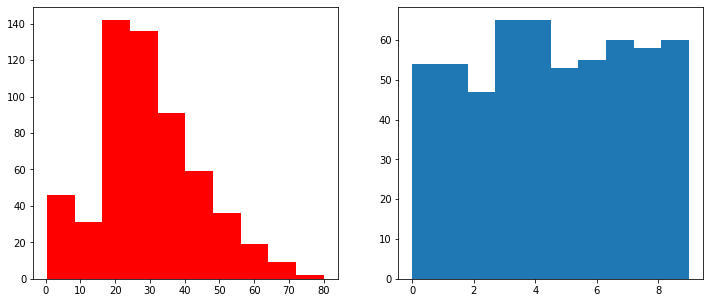

In [72]:
discretisize(12,'uniform')